# Ch. 2 Introductory Examples

## 1. usa.gov data from bit.ly

- 이미 웹에 저장되어 있는 txt 파일을 URL로 접근하여 가져오기 위하여 urllib2 모듈 활용

In [4]:
pathUrl = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [5]:
import urllib2

In [6]:
response = urllib2.urlopen(pathUrl)

In [7]:
type(response)

instance

In [8]:
responseLines = response.readlines()

In [9]:
responseLines[0]

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [10]:
responseLines[1]

'{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n'

- json 포맷으로 컨버팅

In [11]:
import json

In [12]:
records = [json.loads(line) for line in responseLines]

In [13]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [21]:
records[1]

{u'a': u'GoogleMaps/RochesterNY',
 u'c': u'US',
 u'cy': u'Provo',
 u'g': u'mwszkS',
 u'gr': u'UT',
 u'h': u'mwszkS',
 u'hc': 1308262393,
 u'hh': u'j.mp',
 u'l': u'bitly',
 u'll': [40.218102, -111.613297],
 u'nk': 0,
 u'r': u'http://www.AwareMap.com/',
 u't': 1331923249,
 u'tz': u'America/Denver',
 u'u': u'http://www.monroecounty.gov/etc/911/rss.php'}

In [15]:
records[0]['tz']

u'America/New_York'

In [19]:
records[1]['ll']

[40.218102, -111.613297]

### 1) 순수 파이썬으로 Time Zone 카운팅

In [46]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [23]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [24]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

### 2) pandas와 함께 Time Zone 카운팅

In [28]:
from pandas import DataFrame, Series

In [27]:
import pandas as pd

In [25]:
frame = DataFrame(records)

In [26]:
frame[0:2]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [29]:
frame['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [30]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [31]:
tz_counts = frame['tz'].value_counts()

In [32]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

- plot 결과가 ipython notebook 페이지에 보이지 않을 때 아래 명령어 수행

In [38]:
%matplotlib inline

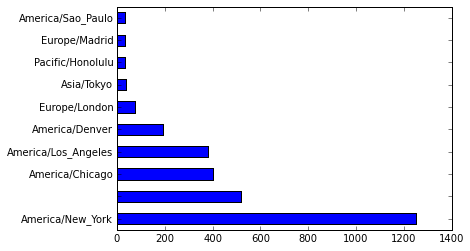

In [39]:
tz_counts[:10].plot(kind='barh', rot=0)

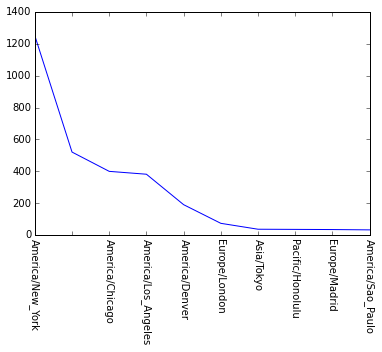

In [40]:
tz_counts[:10].plot(kind='line', rot=270)